In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
boston = load_boston()
target = boston.target
boston.keys()
data = boston.data
target = boston.target
feature_names = boston.feature_names


In [2]:
x = pd.DataFrame(data, columns = feature_names)
print(x.shape)
y = pd.DataFrame(target, columns = ['price'])
print(y.shape)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

(506, 13)
(506, 1)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)
x_train_scaled.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
5,-0.385519,-0.500320,-0.523527,-0.278089,-0.540021,0.162452,-1.926178,0.755292,-0.507797,-0.705154,0.575794,0.408971,-1.038833
6,-0.402695,-0.500320,-0.841560,-0.278089,-0.352880,-0.393595,-1.218030,1.022793,-0.507797,-1.084748,0.845343,0.444180,-0.626249
7,-0.404845,3.175545,-1.487791,-0.278089,-1.246051,0.094710,-1.175112,2.527219,-0.857485,-0.548496,-0.457477,0.444180,-0.941672
8,1.305053,-0.500320,1.033237,-0.278089,1.561057,-0.231297,1.124581,-0.889790,1.706891,1.578434,0.845343,-3.793837,1.970358
9,1.221694,-0.500320,1.033237,-0.278089,0.344643,0.756603,1.124581,-1.100587,1.706891,1.578434,0.845343,-1.934525,1.031130


Task2

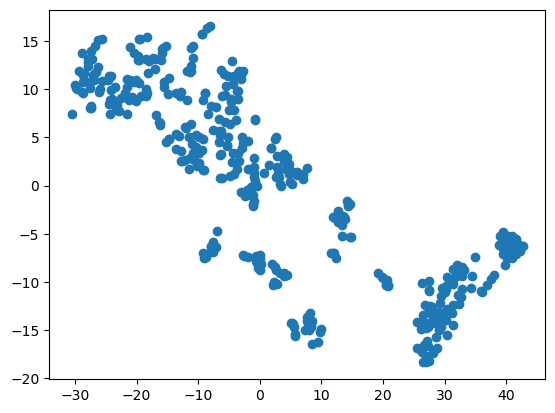

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE (n_components=2, learning_rate=150, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_scaled)
x_train_tsne
x_train_tsne.shape
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1])

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
clustered_train = kmeans.fit_predict(x_train_scaled)
pd.value_counts(clustered_train)


2    191
1    127
0     86
dtype: int64

Text(30, -15, 'cluster3')

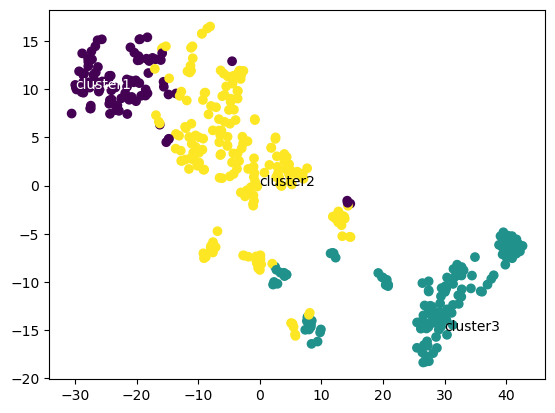

In [53]:
plt.scatter(x_train_tsne[:,0], x_train_tsne[:,1], c=clustered_train)
plt.text(-30, 10, 'cluster1', c='white')
plt.text(0,0, 'cluster2')
plt.text(30,-15, 'cluster3')

хз, грязновато, выбросы какие-то

In [54]:
crimmean1 = x_train.loc[clustered_train==0, 'CRIM'].mean()
crimmean2 = x_train.loc[clustered_train==1, 'CRIM'].mean()
crimmean3 = x_train.loc[clustered_train==2, 'CRIM'].mean()
crimmeans = crimmean1, crimmean2, crimmean3
print(crimmeans)
pricemean1 = y_train.loc[clustered_train==0].mean()
pricemean2 = y_train.loc[clustered_train==1].mean()
pricemean3 = y_train.loc[clustered_train==2].mean()
pricemeans = pricemean1, pricemean2, pricemean3
print(pricemeans)


(0.07356558139534886, 10.797028425196853, 0.42166020942408367)
(price    27.788372
dtype: float64, price    16.165354
dtype: float64, price    24.958115
dtype: float64)


In [56]:
clustered_test = kmeans.predict(x_test_scaled)
pd.value_counts(clustered_test)

crimmean1 = x_test.loc[clustered_test==0, 'CRIM'].mean()
crimmean2 = x_test.loc[clustered_test==1, 'CRIM'].mean()
crimmean3 = x_test.loc[clustered_test==2, 'CRIM'].mean()
crimmeans = crimmean1, crimmean2, crimmean3
print(crimmeans)
pricemean1 = y_test.loc[clustered_test==0].mean()
pricemean2 = y_test.loc[clustered_test==1].mean()
pricemean3 = y_test.loc[clustered_test==2].mean()
pricemeans = pricemean1, pricemean2, pricemean3
print(pricemeans)

(0.07985181818181818, 10.165531142857143, 0.2845831111111111)
(price    28.413636
dtype: float64, price    16.437143
dtype: float64, price    22.031111
dtype: float64)
